In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [106]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [107]:
corr = train.corr()
corr.style.background_gradient(cmap='BrBG').set_precision(2)

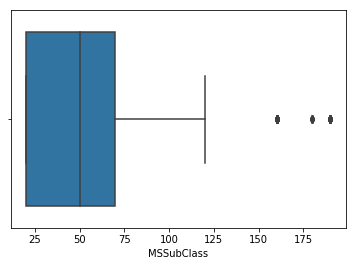

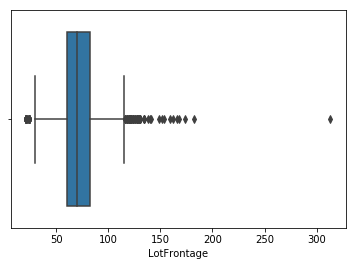

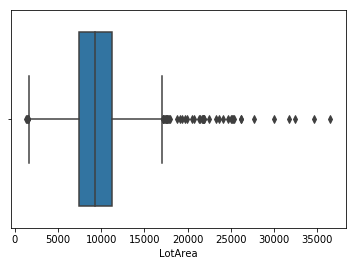

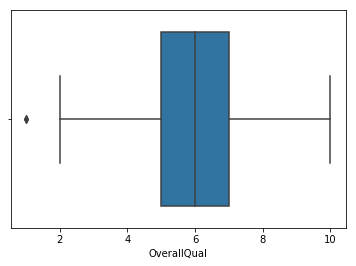

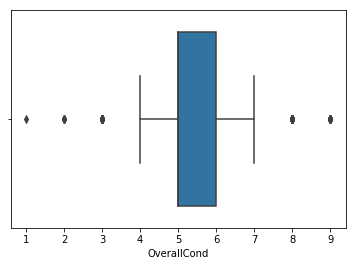

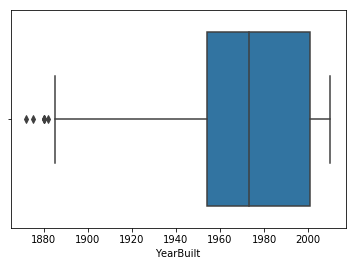

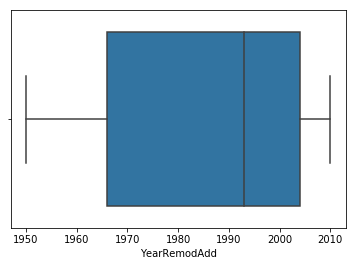

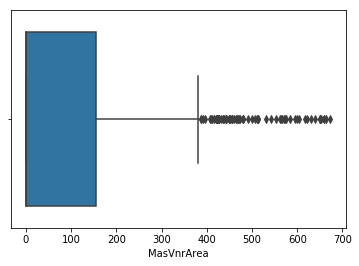

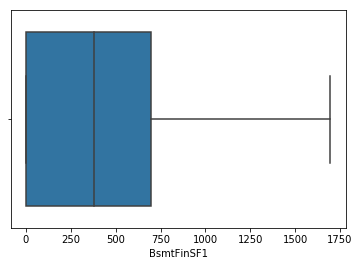

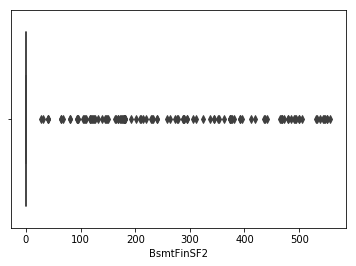

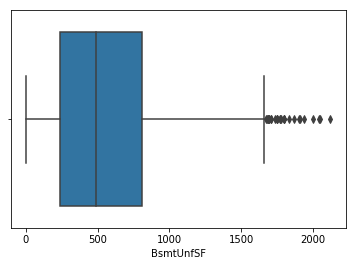

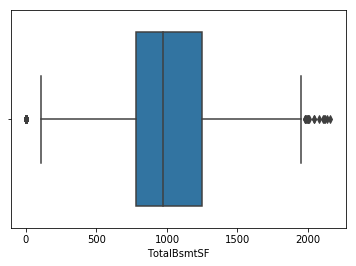

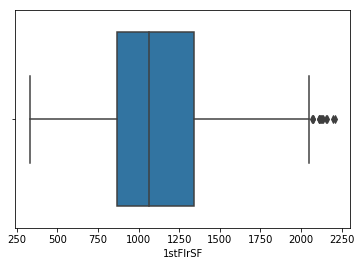

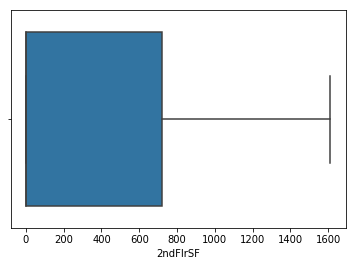

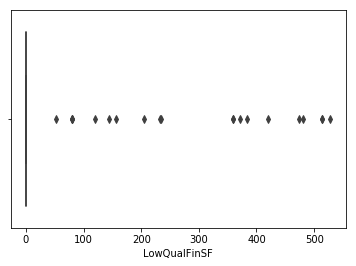

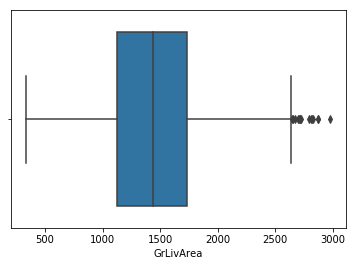

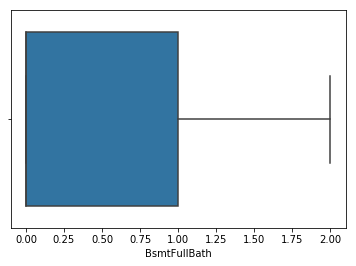

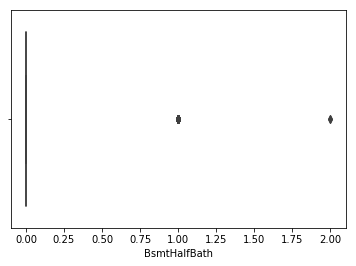

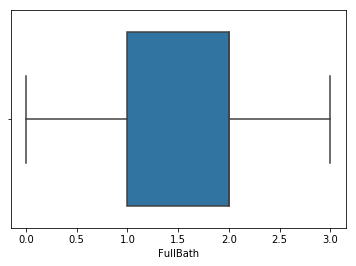

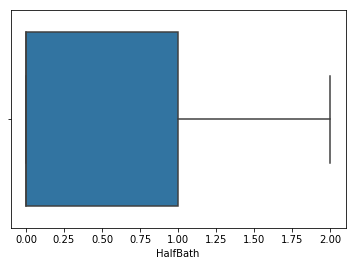

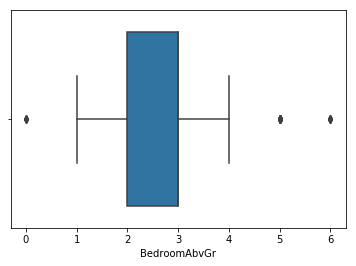

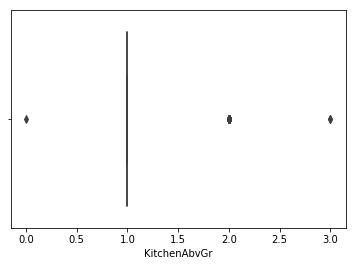

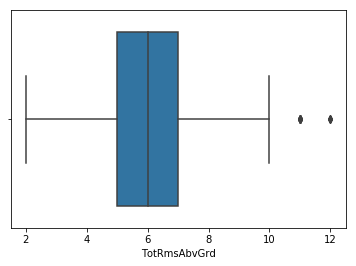

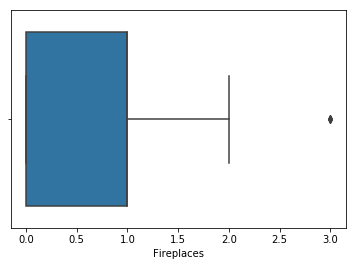

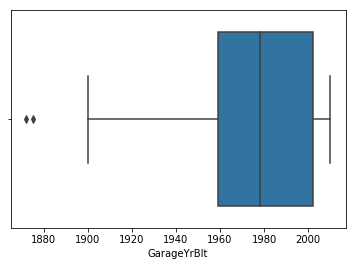

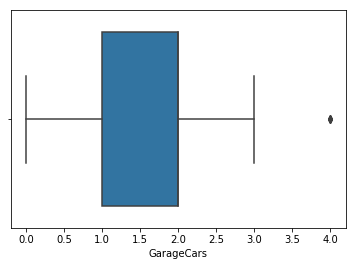

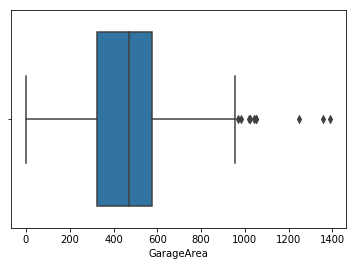

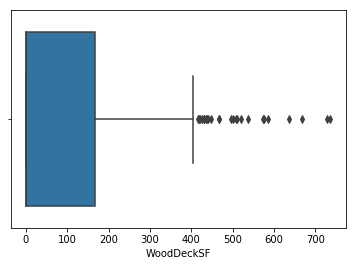

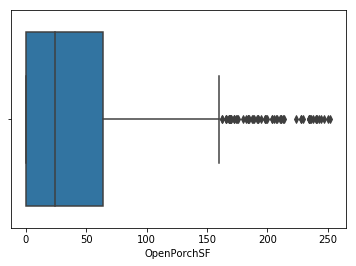

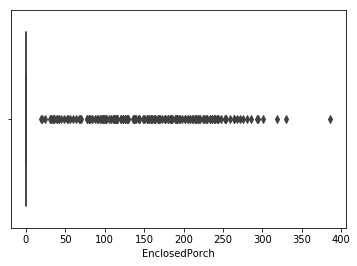

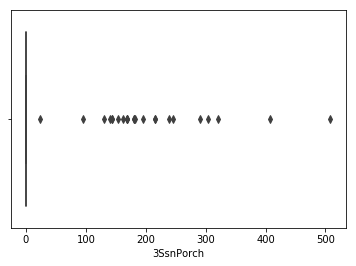

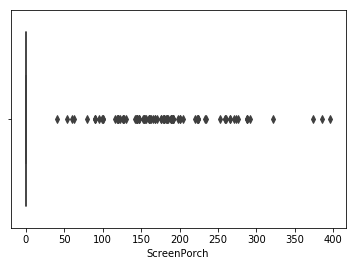

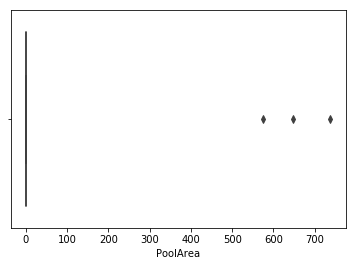

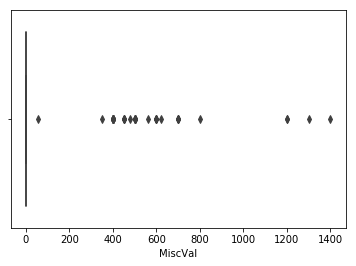

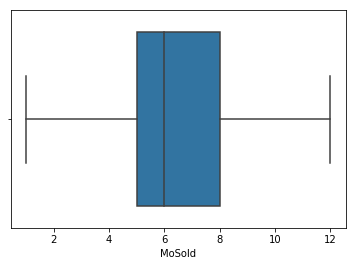

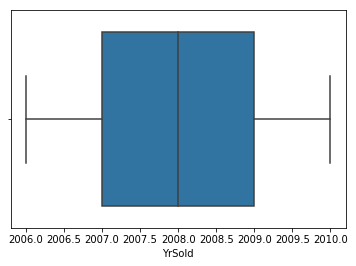

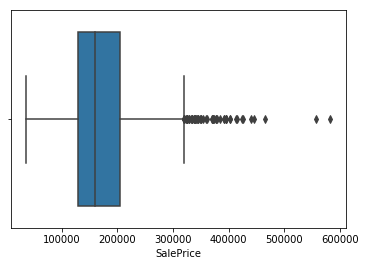

In [99]:
# plot to visualize Outliers
for i in train.select_dtypes([np.number]).columns.tolist():
    sns.boxplot(train[i])
    plt.show()

In [108]:
train.set_index('Id', inplace=True)
train['LotFrontage'].fillna(value= train['1stFlrSF']*0.075, inplace= True)
train['GarageYrBlt'].fillna(value= train['YearBuilt'], inplace=True)
train['FireplaceQu'].fillna(value='None', inplace=True)
train['GarageQual'].fillna(value= 'None', inplace= True)
train['GarageCond'].fillna(value='None', inplace= True)
train['GarageType'].fillna(value='None', inplace=True)
train['GarageFinish'].fillna(value='None', inplace=True)
train['MasVnrArea'].fillna(value=0, inplace= True)
train['MasVnrType'].fillna(value='None', inplace= True)
train['Electrical'].fillna(value='SBrkr', inplace= True)
train['BsmtQual'].fillna(value='None', inplace= True)
train['BsmtCond'].fillna(value='None', inplace= True)
train['BsmtExposure'].fillna(value='None', inplace= True)
train['BsmtFinType1'].fillna(value='None', inplace= True)
train['BsmtFinType2'].fillna(value='None', inplace= True)

train.drop('Alley', axis= 1,inplace=True)
train.drop('PoolQC', axis=1, inplace=True)
train.drop('MiscFeature', axis=1, inplace =True)
train.drop('Fence', axis=1, inplace=True)
train.drop('Utilities', axis=1, inplace=True)

obj_train = train.select_dtypes(include =['object'])

dum_train = pd.get_dummies(train)

In [109]:
test.set_index('Id', inplace=True)

test['LotFrontage'].fillna(value= test['1stFlrSF']*0.075, inplace= True)
test['GarageYrBlt'].fillna(value= test['YearBuilt'], inplace=True)
test['FireplaceQu'].fillna(value='None', inplace=True)
test['GarageQual'].fillna(value= 'None', inplace= True)
test['GarageCond'].fillna(value='None', inplace= True)
test['GarageType'].fillna(value='None', inplace=True)
test['GarageFinish'].fillna(value='None', inplace=True)
test['MasVnrArea'].fillna(value=0, inplace= True)
test['MasVnrType'].fillna(value='None', inplace= True)
test['Electrical'].fillna(value='SBrkr', inplace= True)
test['BsmtQual'].fillna(value='None', inplace= True)
test['BsmtCond'].fillna(value='None', inplace= True)
test['BsmtExposure'].fillna(value='None', inplace= True)
test['BsmtFinType1'].fillna(value='None', inplace= True)
test['BsmtFinType2'].fillna(value='None', inplace= True)
test['MSZoning'].fillna(value= 'RL', inplace= True)      # test['MSZoning'].mode()
test['Exterior1st'].fillna(value= 'VinylSd', inplace= True)  # test['Exterior1st'].mode()
test['Exterior2nd'].fillna(value= 'VinylSd', inplace= True)   # test['Exterior2nd'].mode()
test['SaleType'].fillna(value= 'WD', inplace= True)
test['KitchenQual'].fillna(value= 'TA', inplace= True)
test['Functional'].fillna(value= 'Typ', inplace= True)


test.drop('Alley', axis= 1,inplace=True)
test.drop('PoolQC', axis=1, inplace=True)
test.drop('MiscFeature', axis=1, inplace =True)
test.drop('Fence', axis=1, inplace=True)
test.drop('Utilities', axis=1, inplace=True)

for i in test.select_dtypes([np.number]).columns.tolist():
    if test[i].isna().sum()>0:
             test[i].fillna(value= test[i].mean(), inplace= True)
       
               

obj_test = test.select_dtypes(include =['object'])

dum_test = pd.get_dummies(test)

In [110]:
for i in obj_train:
    if test[i].nunique() == train[i].nunique():
        print('Correct: ', i , test[i].nunique() ,train[i].nunique() )
        
    elif test[i].nunique() != train[i].nunique(): 
        print("Not same # of unique objects:", i, test[i].nunique() ,train[i].nunique()  )

Correct:  MSZoning 5 5
Correct:  Street 2 2
Correct:  LotShape 4 4
Correct:  LandContour 4 4
Correct:  LotConfig 5 5
Correct:  LandSlope 3 3
Correct:  Neighborhood 25 25
Correct:  Condition1 9 9
Not same # of unique objects: Condition2 5 8
Correct:  BldgType 5 5
Not same # of unique objects: HouseStyle 7 8
Correct:  RoofStyle 6 6
Not same # of unique objects: RoofMatl 4 8
Not same # of unique objects: Exterior1st 13 15
Not same # of unique objects: Exterior2nd 15 16
Correct:  MasVnrType 4 4
Correct:  ExterQual 4 4
Correct:  ExterCond 5 5
Correct:  Foundation 6 6
Correct:  BsmtQual 5 5
Correct:  BsmtCond 5 5
Correct:  BsmtExposure 5 5
Correct:  BsmtFinType1 7 7
Correct:  BsmtFinType2 7 7
Not same # of unique objects: Heating 4 6
Correct:  HeatingQC 5 5
Correct:  CentralAir 2 2
Not same # of unique objects: Electrical 4 5
Correct:  KitchenQual 4 4
Correct:  Functional 7 7
Correct:  FireplaceQu 6 6
Correct:  GarageType 7 7
Correct:  GarageFinish 4 4
Not same # of unique objects: GarageQua

In [103]:
featur = []
for j in dum_test.columns.tolist():
    featur.append(j)

In [111]:
obj = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']

In [102]:
# Delete the outliers

list_of_features =['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', 'MSSubClass',
                              'BsmtFullBath','BsmtFullBath','GrLivArea', '2ndFlrSF', 'MiscVal','OpenPorchSF']

for k in list_of_features:
    train.drop(axis = 0, index = train[np.abs(stats.zscore(train[k]))>3.2].index.tolist(), inplace = True)

In [112]:
x_test = test.copy()
x = train.drop('SalePrice', axis=1)
y = train['SalePrice']

import category_encoders as ce

encoder = ce.BinaryEncoder()
encoder.fit(x , y)
x_cleaned = encoder.transform(x)
test_cleaned = encoder.transform(x_test)

In [100]:
x_dum = dum_train[featur]
y_dum = dum_train['SalePrice']

In [101]:
from sklearn.preprocessing import StandardScaler
N = StandardScaler()
N_x = N.fit_transform(x_cleaned)
T_x = N.fit_transform(test_cleaned)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [18]:
# from sklearn.kernel_ridge import KernelRidge

# ker = KernelRidge(alpha = 0.2, kernel ='polynomial', degree = 2, coef0 = 1)

# ker.fit(x_dum, y_dum)
# Yker = enet.predict(dum_test)

In [25]:
# 0.18325
# from sklearn.neural_network import MLPRegressor
# n = MLPRegressor(hidden_layer_sizes=(10,),  activation='relu', solver='adam', alpha=0.001, batch_size='auto',
#                     learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=5000, shuffle=True,
#                     random_state=42, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
#                     early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=0.001)
# n.fit(x_cleaned,y)

# Y= n.predict(test_cleaned)
# pd.DataFrame(data = {'Id':np.arange(1461,2920).tolist(), "SalePrice":Y}).set_index('Id').to_csv('predict_ntttn.csv')

In [27]:
## 0.20392
# from sklearn.linear_model import LinearRegression
# lm = LinearRegression(normalize=True, n_jobs=-1)
# lm.fit(x_cleaned,y)
# Yliner = lm.predict(test_cleaned)
# pd.DataFrame(data = {'Id':np.arange(1461,2920).tolist(), "SalePrice":Y}).set_index('Id').to_csv('predict_True.csv')

In [19]:
# 0.18
# from sklearn.svm import SVR
# svr = SVR(gamma= 0.05 ,C=15,epsilon=0.008)

# svr.fit(x_dum, y_dum)
# Ysvr = RFG.predict(dum_test)

In [26]:
## 0.20029
# from sklearn.linear_model import Lasso
# regl = Lasso(alpha=0.0001, max_iter=50000)

# regl.fit(N_x,y)
# Ylas = regl.predict(T_x)

# pd.DataFrame(data = {'Id':np.arange(1461,2920).tolist(), "SalePrice":Y}).set_index('Id').to_csv('predict_lassoScaled.csv')

In [30]:
# 0.16955
# from sklearn.linear_model import RidgeCV
# ri = RidgeCV(alphas=(0.0001 , 0.009 , 0.01, 0.4 ,10) ,cv= 5)
# ri.fit(x_dum,y_dum)
# Yridge = ri.predict(dum_test)
# pd.DataFrame(data = {'Id':np.arange(1461,2920).tolist(), "SalePrice":Yridge}).set_index('Id').to_csv('predict_Rid_dummy.csv')

In [13]:
## Goood score 0.12855
import xgboost as xgb

rgr = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0 , learning_rate=0.01, max_depth=4, min_child_weight=1.5,
                         n_estimators=7200, reg_alpha=0.9, reg_lambda=0.6, subsample=0.2, seed=42, silent=1)
rgr.fit(x_dum,y_dum)
Yxgb = rgr.predict(dum_test)

#pd.DataFrame(data = {'Id':np.arange(1461,2920).tolist(), "SalePrice":Yxgb}).set_index('Id').to_csv('predict_lllllx.csv')

C:\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [14]:
# 0.13992
from sklearn.linear_model import LassoLarsCV

reg = LassoLarsCV(cv = 10 ,eps= 0.01, max_iter=50000, n_jobs=-1).fit(x_dum,y_dum)
reg.score(x_dum,y_dum)
reg.alpha_

Ylaso = reg.predict(dum_test)

# pd.DataFrame(data = {'Id':np.arange(1461,2920).tolist(), "SalePrice":y_dum}).set_index('Id').to_csv('predict_dum.csv')

In [15]:
# 0.13
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBR.fit(x_dum, y_dum)
Ygbr = GBR.predict(dum_test)

In [16]:
# 0.13
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=0.08, l1_ratio=0.7,max_iter = 40000)

enet.fit(x_dum, y_dum)
Yenet = enet.predict(dum_test)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [17]:
#  0.14
from sklearn.ensemble import RandomForestRegressor
RFG = RandomForestRegressor(n_estimators=1000, max_depth = 25, n_jobs = -1)

RFG.fit(x_dum, y_dum)
Yrfg = RFG.predict(dum_test)

In [23]:
# Merging all 5 regressors and taking the average
# writing it to the CSV file
Y = ( Yxgb + Ylaso + Ygbr + Yenet + Yrfg)/5
pd.DataFrame(data = {'Id':np.arange(1461,2920).tolist(), "SalePrice":Y}).set_index('Id').to_csv('Final_submission')

In [97]:
#############################################################################################################

In [31]:
### Runs for too much time
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import cross_val_score
# import xgboost as xgb
# import pprint
# import scipy.stats as st

# xgb_clf = xgb.XGBRegressor(colsample_bytree=0.75, seed = 0, gamma=0.045, learning_rate=0.05, max_depth=7,min_child_weight=1.5,
#                              n_estimators=500, reg_alpha=0.65, reg_lambda=0.45, subsample=0.8) 

# one_to_left = st.beta(10, 1)  
# from_zero_positive = st.expon(0, 50)

# params = {  
#     "n_estimators": st.randint(3, 40),
#     "max_depth": st.randint(3, 40),
#     "learning_rate": st.uniform(0.05, 0.4),
#     "colsample_bytree": one_to_left,
#     "subsample": one_to_left,
#     "gamma": st.uniform(0, 10),
#     'reg_alpha': from_zero_positive,
#     "min_child_weight": from_zero_positive}

# rsc = RandomizedSearchCV(xgb_clf,  param_distributions = params, verbose=1, n_jobs=1 , cv = 8) 

# rsc.fit(N_x , y)  


# # cross_val_score(xclas, X_train, y_train)  

In [39]:
# x_test = test.copy()
# x = train.drop('SalePrice', axis=1)
# y = train['SalePrice']
# from sklearn.preprocessing import LabelEncoder

# label = LabelEncoder()
# for i in x.select_dtypes(exclude= [np.number]).columns.tolist():
#     label.fit(x[i])
#     x[i] = label.transform(x[i])
#     label.fit(x_test[i])
#     x_test[i] = label.transform(x_test[i])

In [40]:
# from sklearn.preprocessing import MinMaxScaler
# N = MinMaxScaler()
# N_x = N.fit_transform(x)
# T_x = N.fit_transform(x_test)

In [41]:
# from sklearn.linear_model import LassoLarsCV

# reg = LassoLarsCV(cv=10).fit(N_x,y)
# reg.score(N_x,y)
# reg.alpha_

# Y = reg.predict(T_x)

# pd.DataFrame(data = {'Id':np.arange(1461,2920).tolist(), "SalePrice":Y}).set_index('Id').to_csv('predict_new_3_lasso.csv')

In [42]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import f_regression
# kbeat_feat = SelectKBest(f_regression ,k=27)
# kbeat_feat.fit(x,y)

In [43]:
# clf = RandomForestClassifier(n_jobs=None, random_state=42)
# clf.fit(x,y)
# clf.feature_importances_

In [44]:
# pipl = pipline.fit(x,y)
# pred = pipl.predict(x_test)

In [46]:
# from sklearn.linear_model import LassoLarsCV

# reg = LassoLarsCV(cv=10).fit(x,y)
# reg.score(x,y)

In [47]:
# scaler = StandardScaler()
# train_scaled = scaler.fit_transform(x)
# test_scaled = scaler.fit_transform( x_test)

In [48]:
# cor= dum_train.corr()['SalePrice']
# cor[cor>0.22].index

In [49]:
# features= ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
#        'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
#        'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',
#        'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
#        'OpenPorchSF', 'MSZoning_RL', 'LotShape_IR1',
#        'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'HouseStyle_2Story',
#        'RoofStyle_Hip', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
#        'MasVnrType_Stone', 'ExterQual_Ex', 'ExterQual_Gd', 'Foundation_PConc',
#        'BsmtQual_Ex', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'BsmtFinType1_GLQ',
#        'HeatingQC_Ex', 'CentralAir_Y', 'Electrical_SBrkr', 'KitchenQual_Ex',
#        'KitchenQual_Gd', 'FireplaceQu_Ex', 'FireplaceQu_Gd',
#        'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageFinish_Fin',
#        'GarageQual_TA', 'GarageCond_TA', 'PavedDrive_Y', 'SaleType_New','SaleCondition_Partial']

In [50]:
# from sklearn.preprocessing import Imputer
# # values = dum_test.values
# # imputer = Imputer()
# dum_test[dum_test.columns] = imputer.fit_transform(dum_test)
# #dum_test_filled = imputer.fit_transform(values)

In [51]:
# featuer_list =["OverallQual","GrLivArea","GarageCars",
#                "GarageArea","GarageYrBlt","TotalBsmtSF","1stFlrSF",
#                "FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd"]

# # dum_train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF',
# #        '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces',
# #        'GarageYrBlt', 'GarageCars', 'GarageArea',
# #        'Neighborhood_NridgHt', 'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA',
# #        'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_TA', 'BsmtFinType1_GLQ',
# #        'HeatingQC_Ex', 'KitchenQual_Ex', 'KitchenQual_TA', 'FireplaceQu_None',
# #        'GarageFinish_Fin', 'GarageFinish_Unf']]

In [52]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# X, y = dum_train,dum_train['SalePrice']
# X.shape

# X_new1 = SelectKBest(chi2, k=24).fit_transform(X, y)
# X_new1.shape


In [53]:
# dum_train.drop('SalePrice', axis=1).shape

In [55]:
# from sklearn.decomposition import PCA 
# from sklearn.preprocessing import StandardScaler 
# pca = PCA(n_components=33)

# xstd = StandardScaler().fit_transform(dum_train.drop('SalePrice', axis=1))
# xpca = pca.fit_transform(xstd)[:,:]
# y = dum_train['SalePrice']

In [56]:
# x_test = StandardScaler().fit_transform(dum_test)
# xtest = pca.fit_transform(x_test)[:,:]

In [57]:
#train.isna().sum().sum()

In [58]:
# x_test = test.copy()
# x = train.drop('SalePrice', axis=1)
# y = train['SalePrice']
# import xgboost as xgb
# from sklearn.preprocessing import LabelEncoder

# label = LabelEncoder()
# for i in x.select_dtypes(exclude= [np.number]).columns.tolist():
#     label.fit(x[i])
#     x[i] = label.transform(x[i])
#     label.fit(x_test[i])
#     x_test[i] = label.transform(x_test[i])

# model = xgb.XGBRegressor(colsample_bytree=0.75, seed = 0, gamma=0.045, learning_rate=0.05, max_depth=7,min_child_weight=1.5,
#                              n_estimators=500, reg_alpha=0.65, reg_lambda=0.45, subsample=0.8)
# model.fit(x,y)

In [59]:
# model.predict(x_test)
# pd.DataFrame(data = model.predict(x_test), index=range(1461,2920), columns=['SalePrice']).to_csv('predict_xgb.csv')

In [60]:
# from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
# gx = xgb.XGBRegressor()
# reg_cv = GridSearchCV(gx , {'colsample_bytree':[0.2, 0.45 , 0.75], 'gamma':[0.005 ,0.045, 0.1], 'learning_rate':[0.36, 0.6],
#                             'max_depth':[9, 20 , 30], 'min_child_weight':[3 , 5, 9],'random_state':[10],
#                             'n_estimators':[80, 140], 'reg_alpha':[2 , 5], 'reg_lambda':[3 , 5], 'subsample':[0.5 , 0.7]} ,verbose=1)
# reg_cv.fit(x,y)

In [62]:
# reg_cv.best_params_

In [61]:
# gbm = xgb.XGBRegressor(**reg_cv.best_params_)
# gbm.fit(x, y)
# pd.DataFrame(data = gbm.predict(x_test), index=range(1461,2920), columns=['SalePrice']).to_csv('predict_Girdseach_11.csv')

In [63]:
# from scipy import stats
# # df = train.select_dtypes([np.number])
# df_train = df.drop(axis = 0, index= df[(np.abs(stats.zscore(df)>3.2).tolist())].index)
# x = df_train.drop('SalePrice', axis=1)
# y = df_train['SalePrice']

In [64]:
# from sklearn.linear_model import LassoLarsCV

# reg = LassoLarsCV(cv=10).fit(x,y)
# reg.score(x,y)
# reg.alpha_

# Y = reg.predict(x_test)

# pd.DataFrame(data = Y, index=range(1461,2920), columns=['SalePrice']).to_csv('predict_encoder_1.csv')

In [65]:
# from sklearn.metrics import average_precision_score
# average_precision_score(np.array(dum_train['SalePrice']), y)

In [66]:
# from sklearn.datasets import make_regression
# X, y = make_regression(n_samples=1460,n_features=24 ,noise=3.23, random_state=0)

In [67]:
#y.shape

In [68]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# X1= dum_test[F]
# X1.shape

# X_new1_test = SelectKBest(chi2, k=24).fit_transform(X1)
# X_new1_test.shape

In [69]:
# from sklearn.svm import LinearSVC
# from sklearn.feature_selection import SelectFromModel

# X, y = dum_train.drop('SalePrice', axis=1) ,dum_train['SalePrice']
# X.shape

# lsvc = LinearSVC(C=0.3, penalty="l1", dual=False).fit(X, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(X)
# X_new.shape

In [70]:
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.feature_selection import SelectFromModel

# X, y =dum_train.drop('SalePrice', axis=1) ,dum_train['SalePrice']
# X.shape

# clf = ExtraTreesClassifier()
# clf = clf.fit(X, y)
# clf.feature_importances_  

# model = SelectFromModel(clf, prefit=True, threshold= '1.3*mean')
# X_new = model.transform(X)
# X_new.shape               


In [71]:
# dum_test[features].fillna()
# # from sklearn.preprocessing import Imputer
# # imputer =  Imputer(missing_values='NaN', strategy='most_frequent', axis=0)  


In [ ]:
# from sklearn.feature_selection import VarianceThreshold
# X = dum_train[F]
# sel = VarianceThreshold(threshold=(.94* (1 - .94)))
# X_new=sel.fit_transform(X)

In [72]:
# from sklearn.feature_selection import VarianceThreshold
# X1 = dum_test[F]
# sel = VarianceThreshold(threshold=(.94* (1 - .94)))
# X_new_test=sel.fit_transform(X1)

In [73]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split( X_new, dum_train['SalePrice'], test_size=0.33, random_state=123)

In [74]:
# from sklearn import linear_model

# reg = linear_model.LinearRegression()
# reg.fit(dum_train[F] , dum_train['SalePrice'])

# reg_predict =reg.predict(dum_test[F])


In [75]:
# sample =pd.DataFrame(data=reg_predict[:], index= test.index, columns=['SalePrice'])
# #sample.reset_index(level=1).to_csv('sample_submission.csv')
# sample=sample.reset_index(level=0)
# #sample.index = np.arange(1, len(sample) + 1)
# sample.to_csv("reg_predict6.csv", index=False)


In [76]:
# from sklearn import linear_model
# regL = linear_model.LassoLars(alpha=24)
# regL.fit(X_new1, dum_train['SalePrice'])  

# y_pred_lassoL=regL.predict(X_new_test)

# regL.coef_ 
# np.corrcoef(y_pred_lassoL,y_test.values )

In [77]:
# regB = linear_model.BayesianRidge()
# regB.fit(dum_train[F] , dum_train['SalePrice'])
# y_pred_B =regB.predict(dum_test[F])
# regB.coef_
# #np.corrcoef(y_pred_B,y_test.values )

In [79]:
# regR = linear_model.Ridge (alpha =14)
# regR.fit(dum_train[features] , dum_train['SalePrice'])

# regR_predict =regR.predict(dum_test[features])


# regR.coef_

# #regR.intercept_ 

# #np.corrcoef(regR_predict,y_test.values )

In [80]:
# from sklearn.linear_model import ElasticNet

# enet = ElasticNet(alpha=575, l1_ratio=0.7)

# y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
# r2_score(y_test, y_pred_enet)


In [81]:
# plt.scatter(reg_predict, y_test )

In [82]:
# np.corrcoef(y_test.values,reg_predict)

In [83]:
# from sklearn import metrics

# metrics.mean_absolute_error(y_test.values,reg_predict)

In [84]:
# np.sqrt(metrics.mean_squared_error(y_test.values,reg_predict))

In [85]:
# from sklearn.metrics import r2_score
# r2_score(y_test.values,reg_predict)

In [86]:
# from sklearn.metrics import explained_variance_score
# explained_variance_score(y_test.values,reg_predict)

In [87]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(dum_train)
# scalered_train = scaler.transform(dum_train)

# from sklearn.decomposition import PCA
# pca= PCA(n_components =13 )
# pca.fit(scalered_train)
# X_pca= pca.transform(scalered_train)

In [88]:
# scaler.fit(dum_test)
# scalered_test = scaler.transform(dum_test)


# pca.fit(scalered_test)
# X_pca_test= pca.transform(scalered_test)

In [89]:
# regL = linear_model.LassoLars(alpha=.1)
# regL.fit(X_pca , dum_train['SalePrice'])  

# y_pred_lassoL_pca=regL.predict(X_pca_test)

# regL.coef_ 